In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = pd.read_csv("iris.csv")  # Ensure iris.csv is in the same directory
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Filter data for each species
setosa = iris[iris['Species'] == 'Iris-setosa']
versicolor = iris[iris['Species'] == 'Iris-versicolor']
virginica = iris[iris['Species'] == 'Iris-virginica']


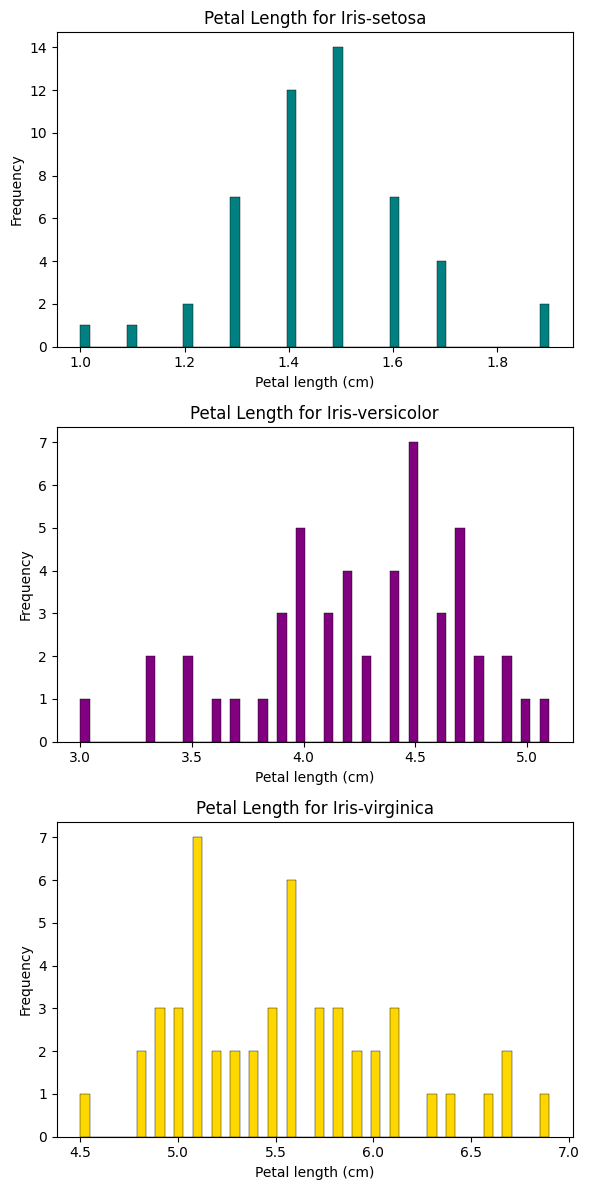

In [5]:
# Petal Length Histograms with thin lines
plt.figure(figsize=(6, 12))

plt.subplot(3, 1, 1)
plt.hist(setosa['PetalLengthCm'], bins=50, color='teal', edgecolor='black', linewidth=0.3)
plt.title('Petal Length for Iris-setosa')
plt.xlabel('Petal length (cm)')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(versicolor['PetalLengthCm'], bins=50, color='purple', edgecolor='black', linewidth=0.3)
plt.title('Petal Length for Iris-versicolor')
plt.xlabel('Petal length (cm)')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(virginica['PetalLengthCm'], bins=50, color='gold', edgecolor='black', linewidth=0.3)
plt.title('Petal Length for Iris-virginica')
plt.xlabel('Petal length (cm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


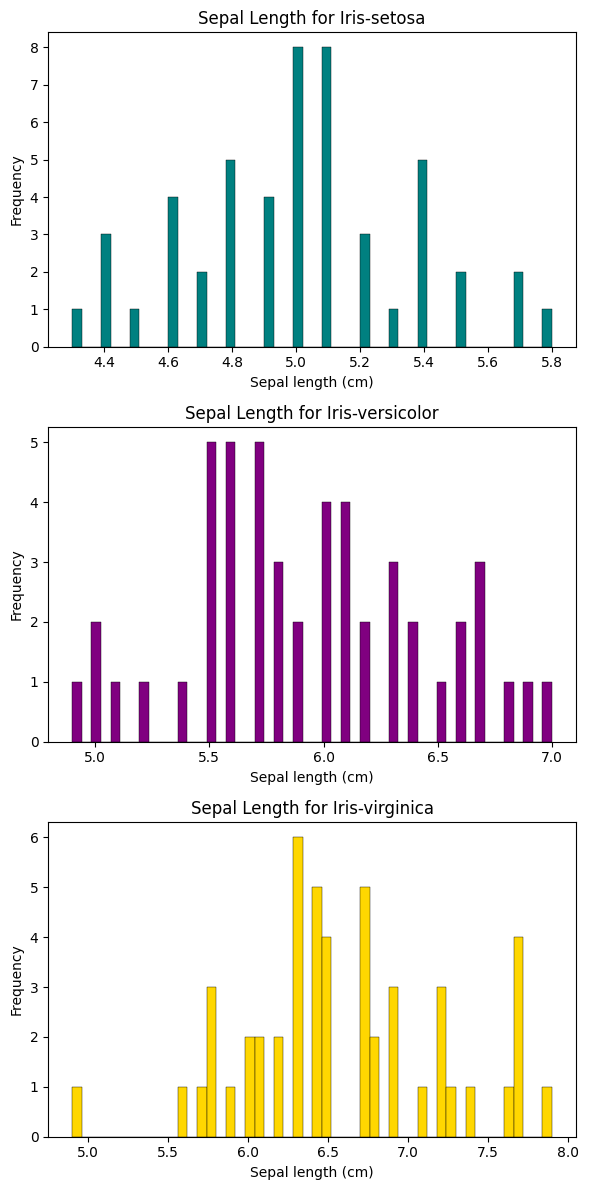

In [6]:
# Sepal Length Histograms with thin lines
plt.figure(figsize=(6, 12))

plt.subplot(3, 1, 1)
plt.hist(setosa['SepalLengthCm'], bins=50, color='teal', edgecolor='black', linewidth=0.3)
plt.title('Sepal Length for Iris-setosa')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(versicolor['SepalLengthCm'], bins=50, color='purple', edgecolor='black', linewidth=0.3)
plt.title('Sepal Length for Iris-versicolor')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(virginica['SepalLengthCm'], bins=50, color='gold', edgecolor='black', linewidth=0.3)
plt.title('Sepal Length for Iris-virginica')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [7]:
# Prepare features (X) and target (y)
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [8]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
# Train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_scaled)


Accuracy: 100.00%
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



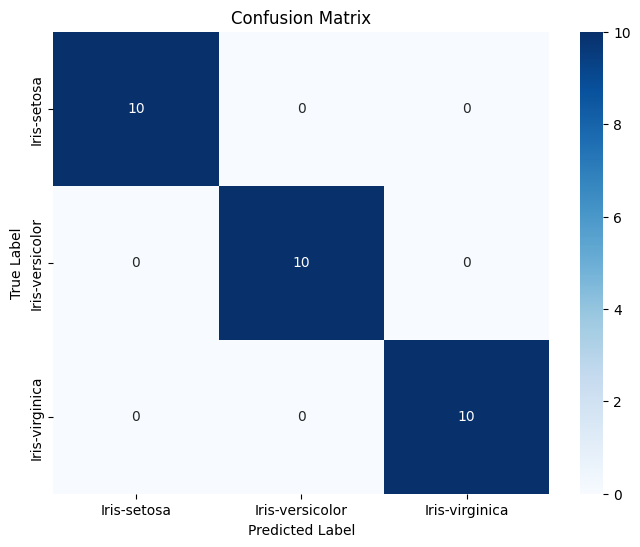

In [10]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris['Species'].unique(), yticklabels=iris['Species'].unique())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


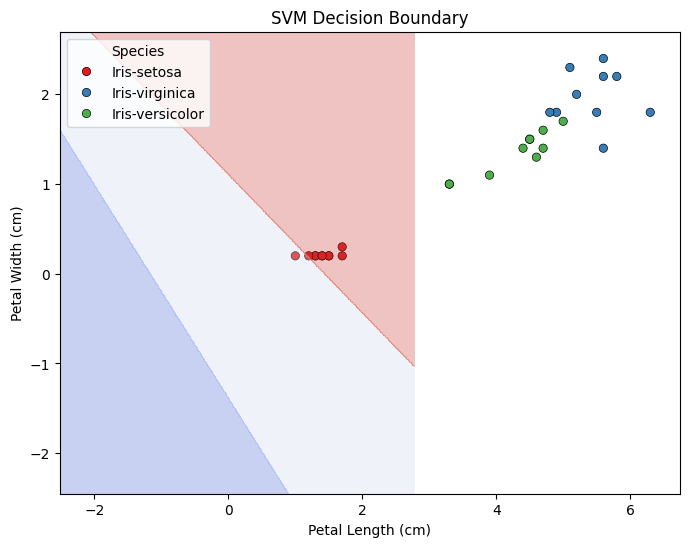

In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y_vis_train_encoded = label_encoder.fit_transform(y_vis_train)
y_vis_test_encoded = label_encoder.transform(y_vis_test)

# Train the SVM classifier on encoded labels
svm_vis_classifier.fit(X_vis_train_scaled, y_vis_train_encoded)

# Create grid for plotting
x_min, x_max = X_vis_train_scaled[:, 0].min() - 1, X_vis_train_scaled[:, 0].max() + 1
y_min, y_max = X_vis_train_scaled[:, 1].min() - 1, X_vis_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on grid points
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = svm_vis_classifier.predict(grid_points)

# Reshape predictions for plotting
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_vis_test['PetalLengthCm'], y=X_vis_test['PetalWidthCm'], hue=y_vis_test, palette='Set1', edgecolor='k')
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title('SVM Decision Boundary')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()
